# Assignment 3

Name - Aryaman Singh Rana 

Roll No. - 1910110093



In [18]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import random

from pandas import DataFrame

from sklearn import svm

import sklearn.datasets

from sklearn.metrics import accuracy_score

from sklearn.datasets import make_classification

from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split

from sklearn.multiclass import OneVsRestClassifier

from sklearn.multiclass import OneVsOneClassifier

### 1.0 Created a seperable and a non seperable datasets -
#### 1.1 Seperable Datasets

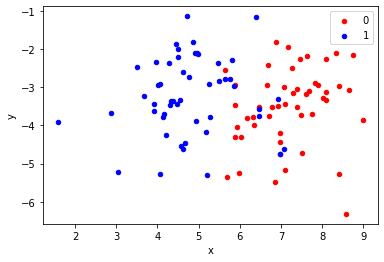

In [68]:
# generated a seperable dataset using make_blobs
sX , sy = make_blobs(n_samples=100, n_features=2,centers=2)

# plotting the data produced 
df = DataFrame(dict(x=sX[:,0], y=sX[:,1], label=sy))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()


#### 1.2 Non-Seperable Dataset

[1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0
 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0]


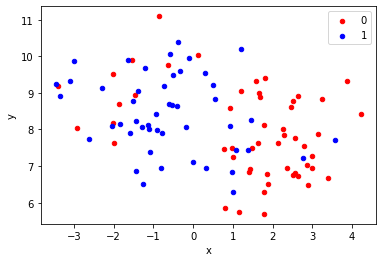

In [69]:
# generated a seperable dataset using make_blobs
nsX , nsy = make_blobs(n_samples=100, n_features=2,centers=2)


# made it non seperable by using sir's method of just flipping random vectors labels opposite
print(nsy)
k = len(nsy)
k = (int)(k*(20/100))

for i in range(0,k):
    if(nsy[i] == 0) :
        nsy[i] =1
    else :
        nsy[i] = 0

# plotting the data produced 
df = DataFrame(dict(x=nsX[:,0], y=nsX[:,1], label=nsy))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

Spliting the seperable and non-seperable datasets

In [70]:
# Seperable dataset
# Spliting the dataset
sX_train, sX_test, sy_train, sy_test = train_test_split(sX, sy, test_size=0.30)

# Non-Seperable dataset
# Spliting the dataset
nsX_train, nsX_test, nsy_train, nsy_test = train_test_split(nsX, nsy,test_size=0.30)

### A. Running C SVM with C=0

I took the smallest possible value of C as SVM cannot take C='0'

In [71]:
# Seperable dataset

# Running the classifier
c = 2**(-31)
# print(c) 

svm_classifier = svm.SVC(kernel='linear',C=c).fit(sX_train, sy_train)

# Training the Model
svm_accuracy = svm_classifier.predict(sX_test)
print("Accuracy of SVM for seperable dataset")
print(accuracy_score(sy_test,svm_accuracy)*100)

# Non-Seperable dataset

# Running the classifier
svm_classifier = svm.SVC(kernel='linear',C=c).fit(nsX_train, nsy_train)

# Training the Model
n_svm_accuracy = svm_classifier.predict(nsX_test)
print("Accuracy of SVM for non-seperable dataset")
print(accuracy_score(nsy_test,n_svm_accuracy)*100)

Accuracy of SVM for seperable dataset
96.66666666666667
Accuracy of SVM for non-seperable dataset
46.666666666666664


### B. Running C SVM with C = 3 , 15

In [72]:
# For C  = 3
# Seperable dataset
svm_classifier = svm.SVC(kernel='linear',C=3).fit(sX_train, sy_train)

svm_accuracy = svm_classifier.predict(sX_test)
print("Accuracy of SVM for seperable dataset with C = 3")
print(accuracy_score(sy_test,svm_accuracy)*100)


# Non-Seperable dataset
svm_classifier = svm.SVC(kernel='linear',C=3).fit(nsX_train, nsy_train)

n_svm_accuracy = svm_classifier.predict(nsX_test)
print("Accuracy of SVM for non-seperable dataset with C = 3")
print(accuracy_score(nsy_test,n_svm_accuracy)*100)

# For C  = 15
# Seperable dataset
svm_classifier = svm.SVC(kernel='linear',C=15).fit(sX_train, sy_train)

svm_accuracy = svm_classifier.predict(sX_test)
print("Accuracy of SVM for seperable dataset with C = 15")
print(accuracy_score(sy_test,svm_accuracy)*100)


# Non-Seperable dataset
svm_classifier = svm.SVC(kernel='linear',C=15).fit(nsX_train, nsy_train)

n_svm_accuracy = svm_classifier.predict(nsX_test)
print("Accuracy of SVM for non-seperable dataset with C = 15")
print(accuracy_score(nsy_test,n_svm_accuracy)*100)

Accuracy of SVM for seperable dataset with C = 3
96.66666666666667
Accuracy of SVM for non-seperable dataset with C = 3
83.33333333333334
Accuracy of SVM for seperable dataset with C = 15
96.66666666666667
Accuracy of SVM for non-seperable dataset with C = 15
83.33333333333334


### C. To tune the value of C to get the best possible result

As I was getting 93.3% for seperable dataset which reamins the same for all values of C. Hence, I moved on to improving the accuracy for non-seperable dataset.

In [73]:
for i in range(5,10000,1000):
  svm_classifier = svm.SVC(kernel='linear',C=i).fit(nsX_train, nsy_train)
  n_svm_accuracy = svm_classifier.predict(nsX_test)
  print("For C = " + str(i) +", Accuracy of SVM = " + str(accuracy_score(nsy_test,n_svm_accuracy)*100))

For C = 5, Accuracy of SVM = 83.33333333333334
For C = 1005, Accuracy of SVM = 80.0
For C = 2005, Accuracy of SVM = 80.0
For C = 3005, Accuracy of SVM = 80.0
For C = 4005, Accuracy of SVM = 80.0
For C = 5005, Accuracy of SVM = 80.0
For C = 6005, Accuracy of SVM = 80.0
For C = 7005, Accuracy of SVM = 80.0
For C = 8005, Accuracy of SVM = 80.0
For C = 9005, Accuracy of SVM = 80.0


I tested out the different values of C within the range of 1 to 10000. And the best accuracy I get is of 80%, but the previous value with C=5 has accuracy of 83.3% which is better.

### D. Changing the kernel to -
- polynomial kernel of size 2 and 3  
- exponential kernel


In [74]:
# For polynomial of size 2
# Seperable dataset
svm_classifier = svm.SVC(kernel='poly', degree = 2,C=3).fit(sX_train, sy_train)

svm_accuracy = svm_classifier.predict(sX_test)
print("Accuracy of SVM for seperable dataset with polynomial kernel of degree 2 = ")
print(accuracy_score(sy_test,svm_accuracy)*100)


# Non-Seperable dataset
svm_classifier = svm.SVC(kernel='poly', degree = 2,C=3).fit(nsX_train, nsy_train)

n_svm_accuracy = svm_classifier.predict(nsX_test)
print("Accuracy of SVM for non-seperable dataset  with polynomial kernel of degree 2 = ")
print(accuracy_score(nsy_test,n_svm_accuracy)*100)

# For polynomial of size 3
# Seperable dataset
svm_classifier = svm.SVC(kernel='poly', degree = 3,C=3).fit(sX_train, sy_train)

svm_accuracy = svm_classifier.predict(sX_test)
print("Accuracy of SVM for seperable dataset with polynomial kernel of degree 3 = ")
print(accuracy_score(sy_test,svm_accuracy)*100)


# Non-Seperable dataset
svm_classifier = svm.SVC(kernel='poly', degree = 3,C=3).fit(nsX_train, nsy_train)

n_svm_accuracy = svm_classifier.predict(nsX_test)
print("Accuracy of SVM for non-seperable dataset  with polynomial kernel of degree 3 = ")
print(accuracy_score(nsy_test,n_svm_accuracy)*100)

# For exponential kernel
# Seperable dataset
svm_classifier = svm.SVC(kernel='rbf', C=3).fit(sX_train, sy_train)

svm_accuracy = svm_classifier.predict(sX_test)
print("Accuracy of SVM for seperable dataset with exponential kernel =")
print(accuracy_score(sy_test,svm_accuracy)*100)


# Non-Seperable dataset
svm_classifier = svm.SVC(kernel='rbf', C=3).fit(nsX_train, nsy_train)

n_svm_accuracy = svm_classifier.predict(nsX_test)
print("Accuracy of SVM for non-seperable dataset  with exponential kernel = ")
print(accuracy_score(nsy_test,n_svm_accuracy)*100)

Accuracy of SVM for seperable dataset with polynomial kernel of degree 2 = 
96.66666666666667
Accuracy of SVM for non-seperable dataset  with polynomial kernel of degree 2 = 
80.0
Accuracy of SVM for seperable dataset with polynomial kernel of degree 3 = 
96.66666666666667
Accuracy of SVM for non-seperable dataset  with polynomial kernel of degree 3 = 
76.66666666666667
Accuracy of SVM for seperable dataset with exponential kernel =
96.66666666666667
Accuracy of SVM for non-seperable dataset  with exponential kernel = 
83.33333333333334


### E. Using C-SVM in different modes -
- One-versus-one mode
- Ove-versus-rest mode

Loading the dataset

In [75]:
from sklearn.datasets import load_iris
data = load_iris()

In [77]:
#import our validation metrics
#set our x, y (input and output)
X, y = data.data, data.target

#split our data into training and validation  (70% training, 30% validation)
X_train,X_test, y_train, y_test=train_test_split(X, y,test_size=0.30)

# One vs Rest Model
ovr_model =  OneVsRestClassifier(svm.SVC( kernel = 'linear'))

#trainng the model :
ovr_model.fit(X_train, y_train)
ovr_prediction = ovr_model.predict(X_test)

print("Accuracy of SVM with One-V-rest = ")
print(accuracy_score(y_test,ovr_prediction)*100)

# One vs one Model
ovo_model =  OneVsOneClassifier(svm.SVC( kernel = 'linear'))

#trainng the model :
ovo_model.fit(X_train, y_train)
ova_prediction = ovo_model.predict(X_test)

print("Accuracy of SVM with One-v-One = ")
print(accuracy_score(y_test,ova_prediction)*100)


Accuracy of SVM with One-V-rest = 
86.66666666666667
Accuracy of SVM with One-v-One = 
97.77777777777777
